# K-Means Clustering

An algorithm capable of clustering a dataset of separate 'blobs' of data together quickly and efficiently.

### Algorithm

1. Randomly assign a number $[1, K]$, to each of the observations. These serve as initial cluster assignments for the observations.
2. Iterate until the cluster assignment stop changing:
    1. For each of the clusters, compute the cluster centroid. The $k$th cluster centroid is the vector of the $p$ feature means for the observations in the $k$th cluster.
    2. Assign each observation to the cluster whose centroid is closest - "closest" being defined by *Euclidean distance*.

In [70]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=0.9)

In [71]:
k = 5  # Number of clusters to be found
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [72]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 3, 3, 3, 3, 4, 2, 2, 3, 2, 0, 4, 4, 0, 1,
       4, 2, 1, 3, 0, 1, 3, 0, 1, 0, 2, 1, 3, 2, 2, 1, 4, 2, 0, 2, 4, 0,
       2, 4, 4, 0, 2, 2, 4, 2, 4, 3, 3, 1, 2, 2, 3, 2, 4, 4, 4, 1, 2, 3,
       2, 1, 1, 1, 1, 3, 0, 0, 1, 2, 0, 4, 3, 1, 1, 4, 0, 4, 2, 1, 3, 2,
       0, 0, 4, 2, 3, 3, 2, 3, 1, 3, 1, 0, 0, 1, 3, 4, 3, 4, 3, 0, 2, 4,
       1, 2, 0, 0, 2, 3, 2, 4, 3, 3, 4, 4, 1, 4, 3, 1, 0, 4, 1, 3, 3, 3,
       4, 4, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 2, 3, 0, 0, 1, 3, 3, 2, 4, 0,
       0, 2, 0, 1, 3, 1, 0, 0, 1, 4, 0, 4, 0, 3, 4, 3, 4, 2, 1, 0, 2, 4,
       4, 2, 1, 0, 1, 2, 4, 3, 3, 0, 4, 2, 4, 1, 0, 2, 3, 2, 4, 2, 4, 3,
       1, 0, 2, 4, 3, 4, 3, 0, 4, 0, 4, 2, 0, 0, 1, 1, 3, 1, 1, 0, 1, 2,
       1, 1, 3, 0, 1, 1, 1, 2, 1, 4, 0, 3, 3, 0, 2, 4, 3, 3, 1, 2, 1, 1,
       2, 3, 1, 0, 3, 0, 2, 3, 4, 2, 3, 0, 1, 2, 3, 4, 0, 1, 4, 2, 0, 2,
       1, 3, 2, 3, 0, 4, 4, 3, 0, 4, 0, 2, 0, 0, 4, 0, 2, 3, 4, 1, 3, 2,
       4, 2, 2, 1, 1, 0, 4, 2, 2, 3, 2, 4, 3, 2], d

In [73]:
y_pred is kmeans.labels_

True

In [74]:
kmeans.cluster_centers_

array([[ 3.50184078, -7.34444155],
       [-6.58534553,  9.43332801],
       [-7.17819138, -8.85328967],
       [ 0.71824903,  2.16938411],
       [-2.63939031,  9.104351  ]])

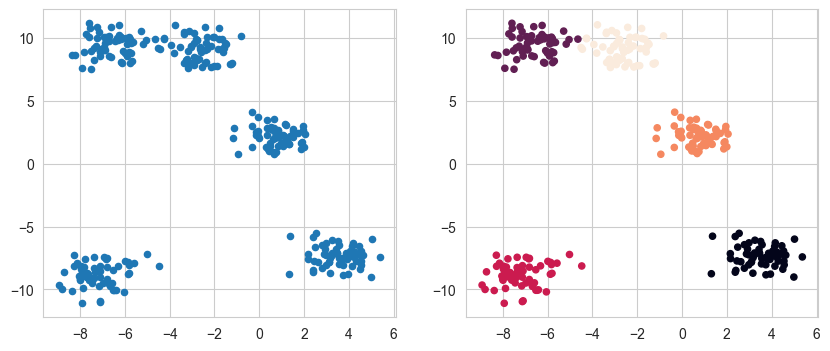

In [75]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=20)

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20)

In [76]:
X_new = np.array([[8, -2], [-2, 8], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 3, 3], dtype=int32)

In [77]:
kmeans.transform(X_new).round(2) # Shows distances to nearest centroid

array([[ 6.99, 18.53, 16.65,  8.39, 15.38],
       [16.3 ,  4.8 , 17.63,  6.43,  1.28],
       [12.22,  7.36, 12.57,  3.81,  6.11],
       [11.8 ,  7.81, 12.1 ,  3.73,  6.61]])

The following is good for understanding up-to-date methods

### K-Means++

1. Take one centroid **$c^{(1)}$**, chosen uniformly at random from the dataset
2. Take a new centroid **$c^{(i)}$**, choosing an instance **$x^{(i)}$** with probability $D(x^{(i)})^2 / \sum_{j=1}^m D(x^{(j)})^2$, where $D(x^{(i)})$ is the distance between $x^{i}$ and closest centroid.
3. Repeat previous steps until all $k$ centroids have been chosen

In [78]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,42
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


### Silhouette Score

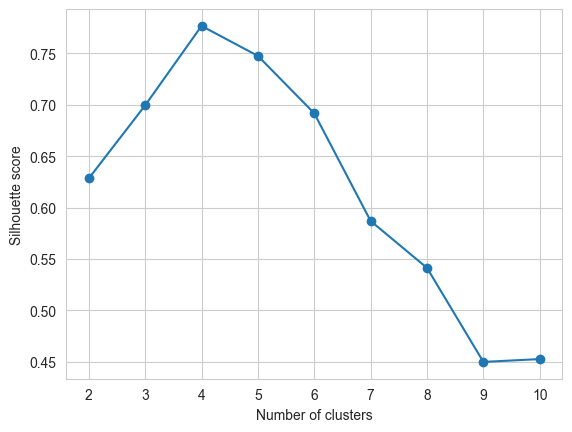

In [79]:
from sklearn.metrics import silhouette_score
k = 10

scores = []
for n_clusters in range(2, k + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, k + 1),scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

## Colour Segmentation

For modern use, CNNs are used, however a simpler version of this uses the K-Means algorithm to identify similar colours and segment parts of an image based upon this.

In [80]:
import PIL
filepath = "Flower_stock_photo.jpg"
image = np.asarray(PIL.Image.open(filepath))
image.shape

(1440, 2160, 3)

In [81]:
X = image.reshape((-1, 3))

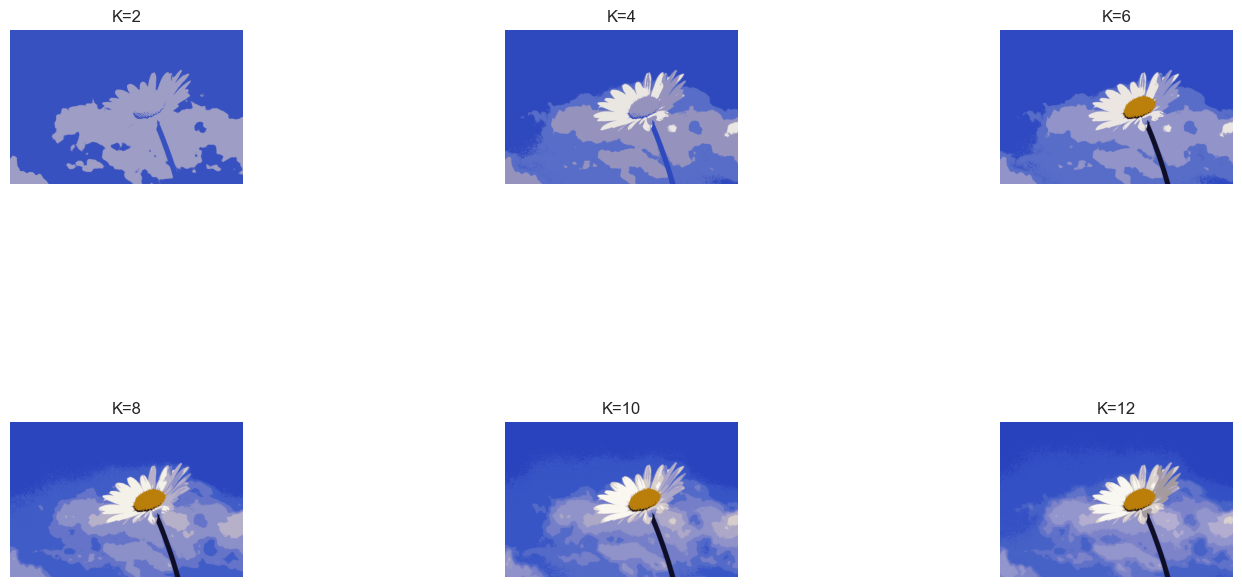

In [86]:
clusters = [2, 4, 6, 8, 10, 12]

plt.figure(figsize=(15,8))
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape).astype(np.uint8)

    plt.subplot(2, len(clusters), i)
    plt.imshow(segmented_img)
    plt.title(f'K={i}')
    plt.axis('off')

plt.tight_layout()
plt.show()